In [1]:
import os
import re

import shutil
import codecs, json 
import nibabel as nib
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import scipy as sp
from scipy import stats
import sklearn as sk
import time
from dypac import Dypac
import nilearn
from nilearn import image, plotting, datasets
from nilearn.input_data import NiftiLabelsMasker, NiftiMasker
from nilearn.connectome import ConnectivityMeasure
from nilearn.decomposition import DictLearning, CanICA
from scipy.stats import pearsonr
import nilearn.plotting as plotting
import hcp_utils as hcp

import helper_functions
import importlib

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


# Extract zip files and delete the original zip files

In [2]:
#dir_name = "/mnt/c/Users/liz/Contacts/Desktop/ValuePercept/zipped_data"

dir_name = "/mnt/e/Liz_HCP/data_saved"

subjects = os.listdir(dir_name)

len(subjects)

47

In [48]:
subjects = os.listdir(dir_path)
subjects

['147737']

In [3]:
#import helper_functions

helper_functions.unzip(dir_name) #Extract zip files and delete the original zip files

In [4]:
#refresh the loaded function
#import importlib

importlib.reload(helper_functions)

<module 'helper_functions' from '/mnt/c/Users/liz/Contacts/Desktop/ValuePercept/helper_functions.py'>

# Load data & concatenate the 4 sessions

In [50]:
import helper_functions

#Load data & concatenate the 4 sessions

dir_path = "/mnt/c/Users/liz/Contacts/Desktop/ValuePercept/zipped_data"
sessions = ['1_LR', '1_RL','2_LR','2_RL']
file_name = '_Atlas_MSMAll_hp2000_clean.dtseries.nii'
saved_dir_path = "/mnt/c/Users/liz/Contacts/Desktop/ValuePercept/concatenated_data/"

helper_functions.concat(dir_path, sessions, file_name, saved_dir_path)

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


finished subject 147737


# Load the concatenated files

In [5]:
#dir_name = '/mnt/c/Users/liz/Contacts/Desktop/course-materials-2020/fMRI_HCP/saved_data'

#dir_name = '/mnt/d/Liz_HCP/data_saved'

dir_name = '/mnt/c/Users/liz/Contacts/Desktop/ValuePercept/concatenated_data'

subjects = os.listdir(dir_name)

len(subjects)

3

In [3]:
#Delate the npz ending
subjects_num = []

for i in range(len(subjects)):
    subjects_num.append(subjects[i][:6])

subjects_num  

#Save a list of subject IDs
#with open('subID_47.txt', 'w') as f:
 #   f.write(json.dumps(subjects_num))

['100307',
 '100408',
 '101107',
 '101309',
 '101915',
 '103111',
 '103414',
 '103818',
 '105014',
 '105115',
 '106016',
 '108828',
 '110411',
 '111312',
 '111716',
 '113619',
 '113922',
 '114419',
 '116524',
 '117122',
 '118528',
 '118730',
 '118932',
 '122317',
 '122620',
 '123117',
 '123925',
 '124422',
 '125525',
 '126325',
 '127630',
 '127933',
 '128127',
 '128632',
 '129028',
 '130013',
 '130316',
 '131217',
 '131722',
 '133019',
 '133928',
 '135225',
 '135932',
 '136833',
 '138534',
 '139637',
 '140925']

In [4]:
#Convert subject nums from strings to integers
subjects_num = list(map(int, subjects_num))
print(subjects_num)

[100307, 100408, 101107, 101309, 101915, 103111, 103414, 103818, 105014, 105115, 106016, 108828, 110411, 111312, 111716, 113619, 113922, 114419, 116524, 117122, 118528, 118730, 118932, 122317, 122620, 123117, 123925, 124422, 125525, 126325, 127630, 127933, 128127, 128632, 129028, 130013, 130316, 131217, 131722, 133019, 133928, 135225, 135932, 136833, 138534, 139637, 140925]


In [7]:
#Save subject IDs into a file
with open('subID_47.txt', 'w') as filehandle:
    for listitem in subjects_num:
        filehandle.write('%s\n' % listitem)

In [8]:
paths = []
for sub in subjects:
    paths.append(dir_name + '/{0}'.format(sub))
data = paths
data

['/mnt/c/Users/liz/Contacts/Desktop/ValuePercept/concatenated_data/100307.npz',
 '/mnt/c/Users/liz/Contacts/Desktop/ValuePercept/concatenated_data/111312.npz',
 '/mnt/c/Users/liz/Contacts/Desktop/ValuePercept/concatenated_data/147737.npz']

# Parcellation + correlation matrix

In [6]:
#Create the wanted connectivity matrix
from nilearn import connectome
#kind{“correlation”, “partial correlation”, “tangent”, “covariance”, “precision”}
correlation_measure = connectome.ConnectivityMeasure(kind='correlation')
correlation_measure

ConnectivityMeasure(kind='correlation')

In [7]:
all_features = [] # here is where we will put the data (a container)
#saved_dir_path = '/mnt/c/Users/liz/Contacts/Desktop/course-materials-2020/fMRI_HCP/saved_matrices/'

for i,sub in enumerate(data):
    #load data
    load_data = np.load(data[i])['a']
    # parcell the data according to a specific atlas
    parcellated_data = (hcp.parcellate(load_data, hcp.yeo17))
    # create a region x region correlation matrix
    correlation_matrix = correlation_measure.fit_transform([parcellated_data])[0]
    # add to our container
    #np.savez_compressed(saved_dir_path + i, a = correlation_matrix)
    all_features.append(correlation_matrix)
    # keep track of status
    print('finished %s of %s'%(i+1,len(data)))

finished 1 of 47
finished 2 of 47
finished 3 of 47
finished 4 of 47
finished 5 of 47
finished 6 of 47
finished 7 of 47
finished 8 of 47
finished 9 of 47
finished 10 of 47
finished 11 of 47
finished 12 of 47
finished 13 of 47
finished 14 of 47
finished 15 of 47
finished 16 of 47
finished 17 of 47
finished 18 of 47
finished 19 of 47
finished 20 of 47
finished 21 of 47
finished 22 of 47
finished 23 of 47
finished 24 of 47
finished 25 of 47
finished 26 of 47
finished 27 of 47
finished 28 of 47
finished 29 of 47
finished 30 of 47
finished 31 of 47
finished 32 of 47
finished 33 of 47
finished 34 of 47
finished 35 of 47
finished 36 of 47
finished 37 of 47
finished 38 of 47
finished 39 of 47
finished 40 of 47
finished 41 of 47
finished 42 of 47
finished 43 of 47
finished 44 of 47
finished 45 of 47
finished 46 of 47
finished 47 of 47


In [8]:
len(all_features)

47

In [9]:
connectivity_data = np.array(all_features)

In [10]:
connectivity_data.shape

(47, 17, 17)

In [11]:
np.savez_compressed('all_features_47_P17',a = all_features)

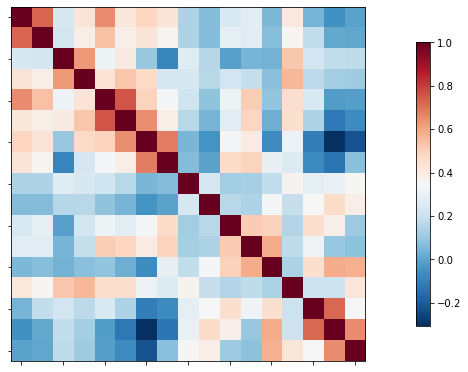

In [12]:
correlation_matrix = connectivity_data[0]
# Mask the main diagonal for visualization:
# np.fill_diagonal(correlation_matrix, 0)
plotting.plot_matrix(correlation_matrix)

# Parcellation - exploration 

In [7]:
load_data = np.load(data[0])['a']
load_data

array([[-0.58150059, -0.07257439,  0.41164436, ..., -0.33437856,
         0.08478886,  0.96278024],
       [ 0.51948119,  0.11188246, -0.51882494, ..., -0.84530077,
        -0.88306422, -0.91523936],
       [-0.38519595, -0.90026091,  0.20469507, ...,  1.11351438,
        -0.02223519,  0.80914969],
       ...,
       [ 1.32761109,  0.0781248 ,  0.24640727, ...,  0.48838678,
         0.49386945,  0.676148  ],
       [-0.3717102 ,  1.78386521,  0.302471  , ..., -0.76850696,
        -1.18447781, -0.37078367],
       [-0.53680091,  0.1731067 ,  1.95317385, ..., -0.75634734,
        -0.58975406, -1.90355982]])

In [8]:
load_data.shape

(4800, 91282)

In [12]:
type(load_data)

numpy.ndarray

In [17]:
parcellated_data = (hcp.parcellate(load_data, hcp.mmp))
parcellated_data.shape

(4800, 379)

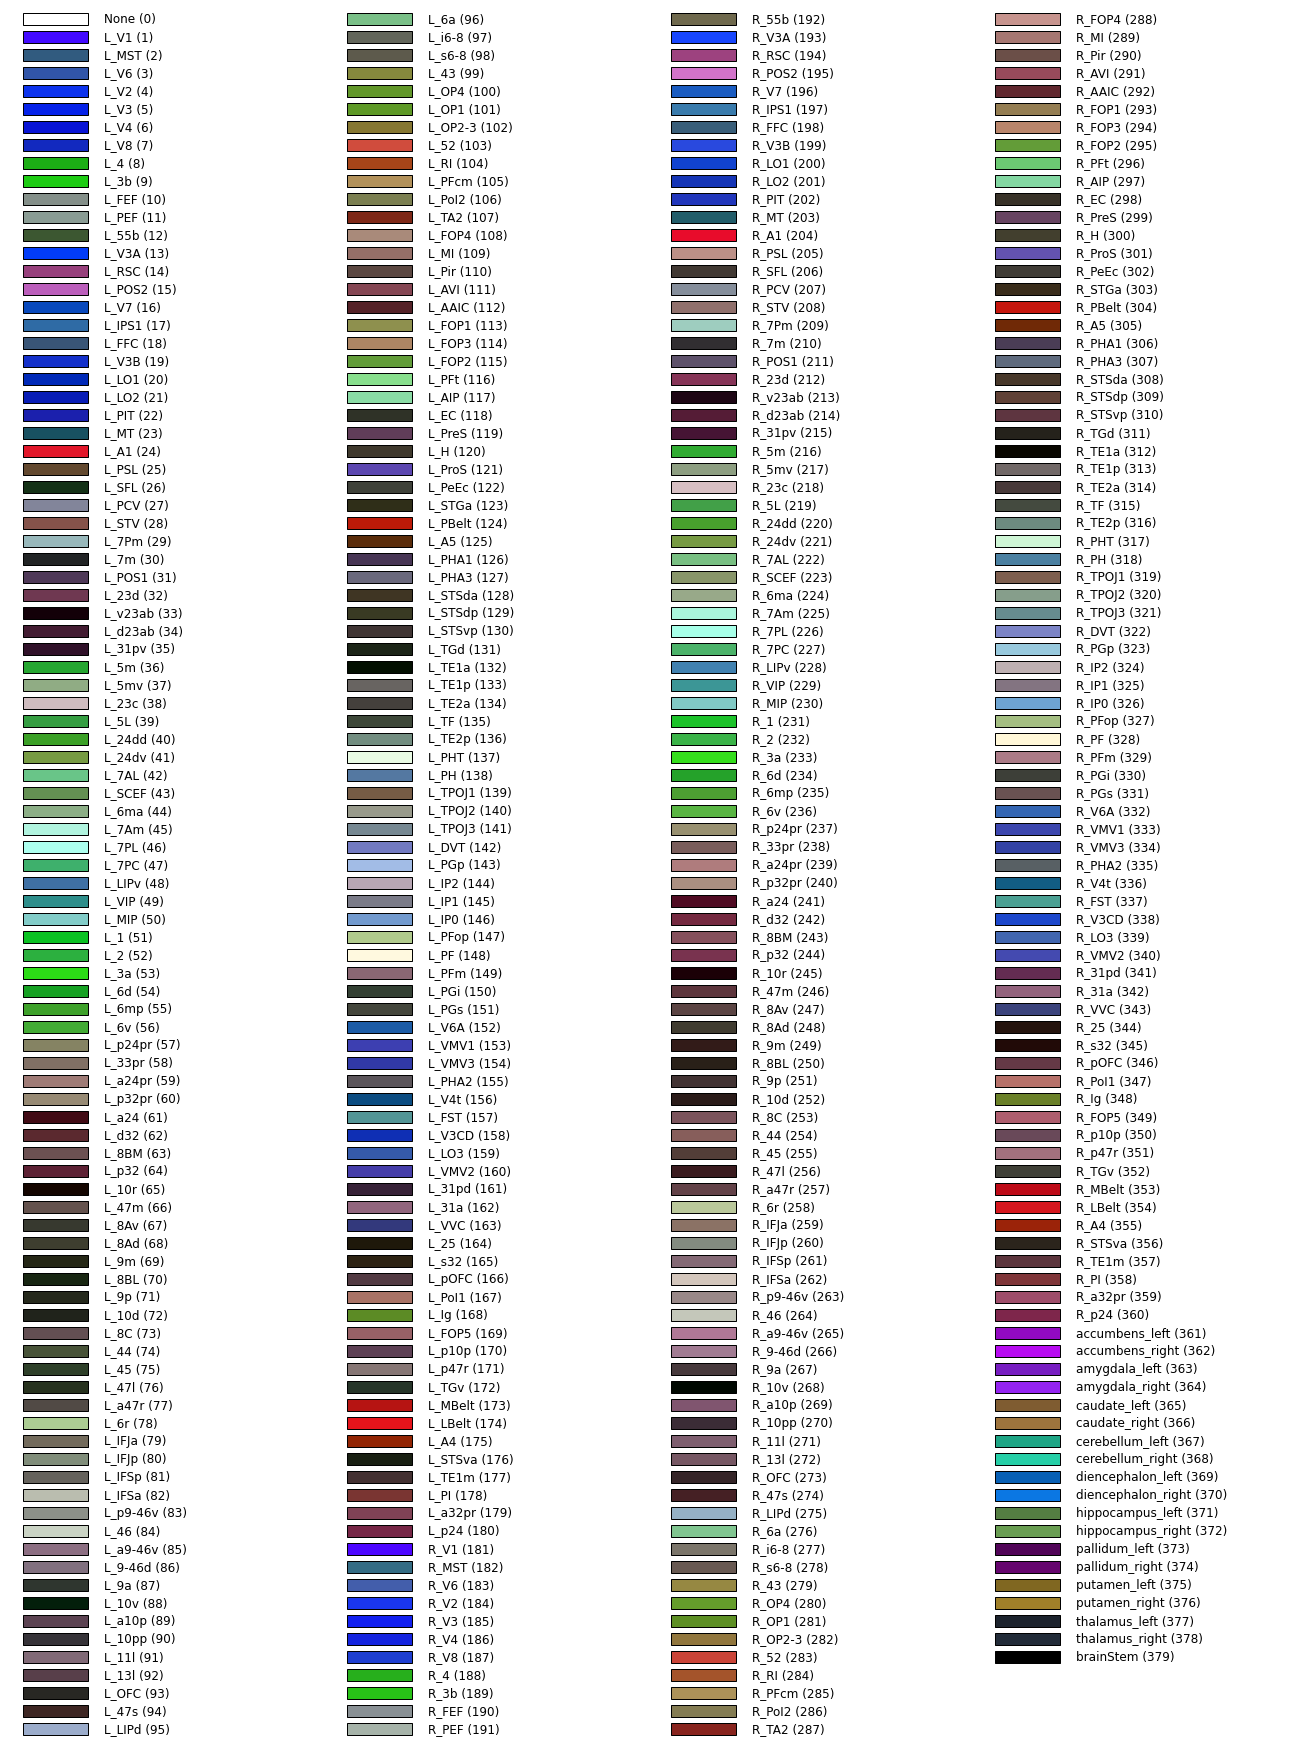

In [18]:
labels = hcp.parcellation_labels(hcp.mmp)

In [19]:
#Create the wanted connectivity matrix
from nilearn import connectome
#kind{“correlation”, “partial correlation”, “tangent”, “covariance”, “precision”}
correlation_measure = connectome.ConnectivityMeasure(kind='correlation')
correlation_measure

ConnectivityMeasure(kind='correlation')

In [21]:
connectivity_data = correlation_measure.fit_transform([parcellated_data])
connectivity_data.shape

(1, 379, 379)

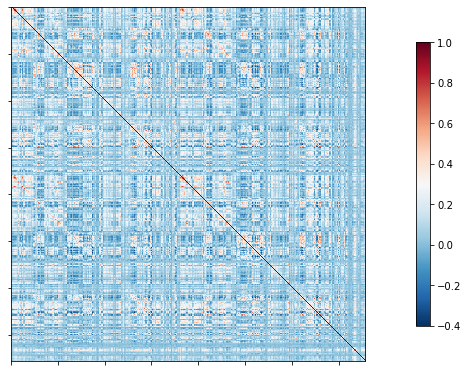

In [23]:
plotting.plot_matrix(connectivity_data[0])

In [14]:
from brainspace.datasets import load_group_fc, load_parcellation

labeling = load_parcellation('schaefer', scale=200, join=True)
m = load_group_fc('schaefer', scale=200)
m.shape


(200, 200)

In [124]:
schafer_parcel = nilearn.datasets.fetch_atlas_schaefer_2018(n_rois=200, yeo_networks=7, resolution_mm=1, data_dir=None, base_url=None, resume=True, verbose=1)

Downloaded 8482 of 8482 bytes (100.0%,    0.0s remaining) ...done. (1 seconds, 0 min)


Downloaded 259065 of 259065 bytes (100.0%,    0.0s remaining) ...done. (1 seconds, 0 min)


In [127]:
from nilearn.input_data import NiftiLabelsMasker
label_masker = NiftiLabelsMasker(labels_img=schafer_parcel)
label_masker

NiftiLabelsMasker(labels_img={'description': b'Schaefer 2018 Atlas\r\n\r\n\r'
                                             b'\nNotes\r\n-----\r\nThis atla'
                                             b's provides a labeling of cortica'
                                             b'l voxels in the MNI152\r\nspac'
                                             b'e, see Schaefer et al. (2018). E'
                                             b'ach ROI is annotated with a\r'
                                             b'\nnetwork from the Yeo parcel'
                                             b'lation (7- or 17-network solutio'
                                             b'n; see\r\nYeo et al., 2011).\r\n'
                                             b'\r\n\r\nDifferent versions of th'
                                             b'e atlas...
       b'7Networks_RH_Default_PFCdPFCm_4',
       b'7Networks_RH_Default_PFCdPFCm_5',
       b'7Networks_RH_Default_PFCdPFCm_6',
       b'7Network

In [128]:
fmri_matrix = label_masker.fit_transform(load_data)
print(fmri_matrix)

ValueError: File not found: 'maps'

In [129]:
type(schafer_parcel)

sklearn.utils.Bunch